In [9]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

In [10]:
class_num = 10
#[0,1,2,3,4,5,6,7,8,9]

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
print (X_train.shape)
print (X_test.shape)
print (y_train[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]


In [13]:
print (y_train.shape)

(60000,)


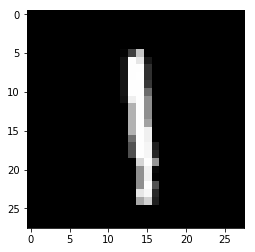

In [14]:
plt.imshow(X_train[8], cmap="gray")
plt.show()

In [15]:
print(y_train[8])

1


In [16]:
X_train[0][...,None].shape

(28, 28, 1)

In [17]:
def processData(x, y):
    '''
        x: images array
        y: lables array
    '''
    images = []
    lables = []
    for i in range(len(x)):
        '''
        name = "test.jpg"
        cv2.imread(name)
        
        '''
        values = np.zeros(class_num)
        images.append(x[i][..., None])
        values[y[i]] = 1
        lables.append(values)
    
    return np.array(images), np.array(lables)
    
    

In [18]:
x, y = processData(X_train, y_train)

In [19]:
np.array(x).shape

(60000, 28, 28, 1)

In [18]:
np.array(y).shape

(60000, 10)

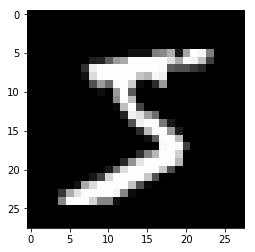

In [19]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

In [20]:
print(y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
from keras.models import Model, Input
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Lambda, Dropout
from keras import optimizers

In [22]:
w = 28
h = 28
channel = 1

In [23]:
input_img = Input(shape=(h,w,channel))

normal = Lambda(lambda x: x/127.5 -1)(input_img)
conv1 = Conv2D(32,(3,3), activation="relu")(normal)
max1 = MaxPool2D()(conv1)
out = Conv2D(64,(3,3), activation="relu")(max1)
out = MaxPool2D()(out)
out = Conv2D(96,(3,3), activation="relu")(out)
out = Conv2D(128,(3,3), activation="relu")(out)
out = Flatten()(out)
out = Dropout(0.5)(out)
out = Dense(200, activation="relu")(out)
out = Dense(100, activation="relu")(out)
out = Dense(class_num, activation="softmax")(out)

model = Model(inputs=input_img, outputs = out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 96)          55392     
__________

In [24]:
adam = optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=adam)

In [25]:
model.fit(x,y,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.2111
Epoch 2/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.0715
Epoch 3/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.05440s - l
Epoch 4/10
60000/60000 [==============================] - 37s 625us/step - loss: 0.0438
Epoch 5/10
60000/60000 [==============================] - 37s 610us/step - loss: 0.0363
Epoch 6/10
60000/60000 [==============================] - 37s 617us/step - loss: 0.0315
Epoch 7/10
60000/60000 [==============================] - 34s 567us/step - loss: 0.0276
Epoch 8/10
60000/60000 [==============================] - 36s 598us/step - loss: 0.0257
Epoch 9/10
60000/60000 [==============================] - 35s 584us/step - loss: 0.0230
Epoch 10/10
60000/60000 [==============================] - 34s 574us/step - loss: 0.0214


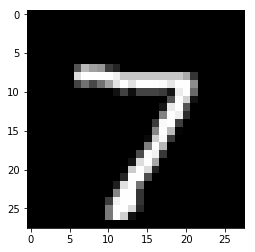

In [42]:
plt.imshow(X_test[0], cmap="gray")
plt.show()

In [43]:
X_test[0].shape

(28, 28)

In [44]:
X_test[0][None, ..., None].shape

(1, 28, 28, 1)

In [45]:
pred = model.predict(X_test[0][None, ..., None])

In [46]:
print(pred[0])
print (len(pred[0]))

[1.0175234e-16 5.7448950e-12 7.3329049e-09 5.3108087e-12 1.8171211e-12
 3.6452694e-15 1.5627090e-26 1.0000000e+00 2.6956544e-17 1.3922098e-08]
10


In [47]:
np.argmax(pred)

7

In [48]:
import cv2

In [49]:
img = cv2.imread("test1.jpg")

TypeError: Image data cannot be converted to float

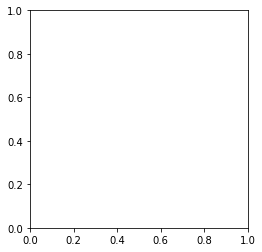

In [36]:
plt.imshow(img)

In [37]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/imgproc/src/color.cpp:7456: error: (-215) scn == 3 || scn == 4 in function ipp_cvtColor


In [38]:
np.array(img).shape

()

TypeError: Image data cannot be converted to float

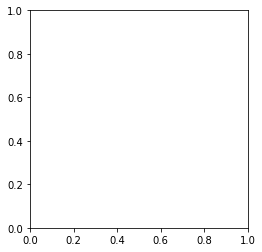

In [39]:
#img = cv2.resize(img, (28,28))
plt.imshow(img, cmap="gray")

In [40]:
print(np.argmax(model.predict(img[None, ..., None])))

TypeError: 'NoneType' object is not subscriptable

In [41]:
model.save("examples.h5")